In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import category_encoders as ce
from pandas.api.types import is_numeric_dtype, is_object_dtype
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [151]:
# load data from csv file
df = pd.read_csv("salary.csv", sep=',')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [152]:
# summary
df.info()
# statistic
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [153]:
# count missing values for each column
print("Missing Value: ", sum(df.isnull().sum()))
# count duplicatte values
print("Duplicated Value: ", df.duplicated().sum())

Missing Value:  0
Duplicated Value:  24


In [154]:
# Remove duplicate
unique_records = df.drop_duplicates()
redundant_records = df[df.duplicated()]
df = df.drop_duplicates()

print("Duplicated Value: ", df.duplicated().sum())

Duplicated Value:  0


In [155]:
# Checking labels in the categorical features
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex
[' Male' ' Female']

native-country
[' United-States' ' Cuba' ' Jamaica' ' 

In [156]:
# Count native countries
df['native-country'].value_counts()

 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [157]:
# Remove extra space
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Seperate native country to two dataframes
US = df[df['native-country'] == 'United-States']
NonUS = df[df['native-country'] != 'United-States']

print('US', US.shape)
print('NonUS', NonUS.shape)

US (29153, 15)
NonUS (3384, 15)


(Text(0.5, 0, ''), Text(0, 0.5, ''), ([], []))

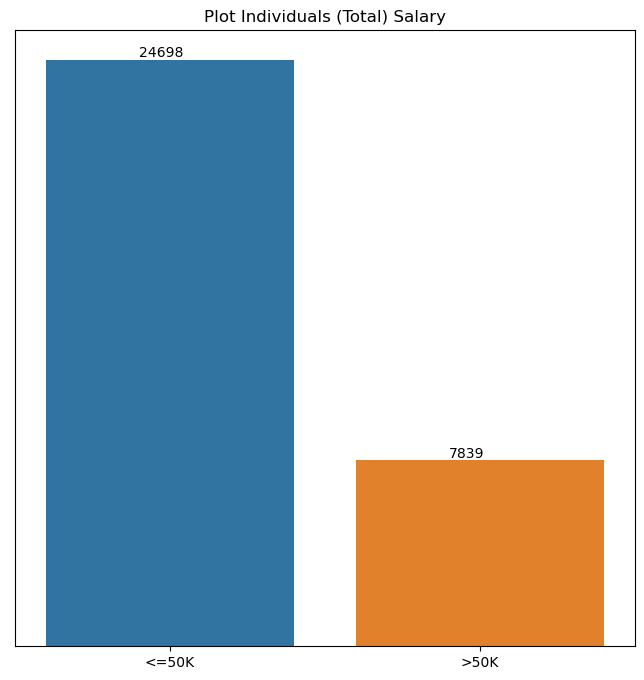

In [158]:
# Plot Individuals (Total) Salary
plt.figure(figsize=(8, 8))
salaryCount = df['salary'].value_counts()
ax = sns.countplot(x="salary", data=df, order=salaryCount.index)
plt.title('Plot Individuals (Total) Salary')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+100))
plt.xlabel(None), plt.ylabel(None), plt.yticks([])


(Text(0.5, 0, ''), Text(0, 0.5, ''), ([], []))

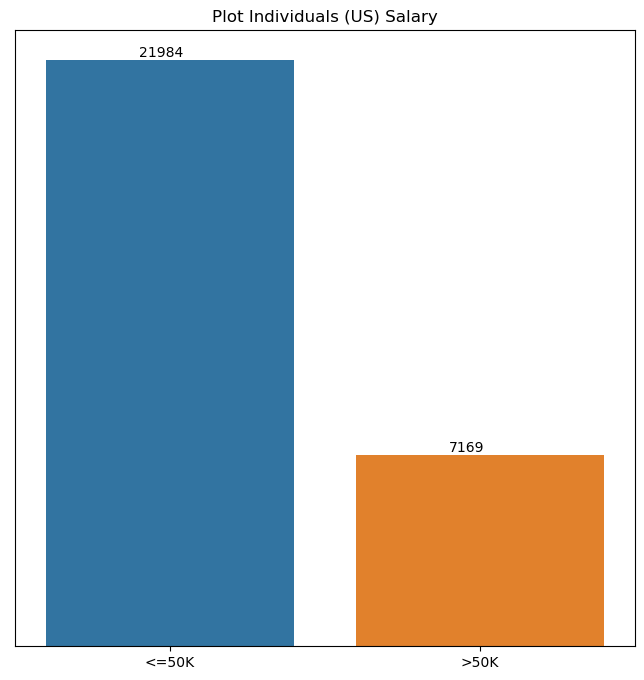

In [159]:
# Plot Individuals (US) Salary
plt.figure(figsize=(8, 8))
ax = sns.countplot(x="salary", data=US, order=salaryCount.index)
plt.title('Plot Individuals (US) Salary')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+100))
plt.xlabel(None), plt.ylabel(None), plt.yticks([])


(Text(0.5, 0, ''), Text(0, 0.5, ''), ([], []))

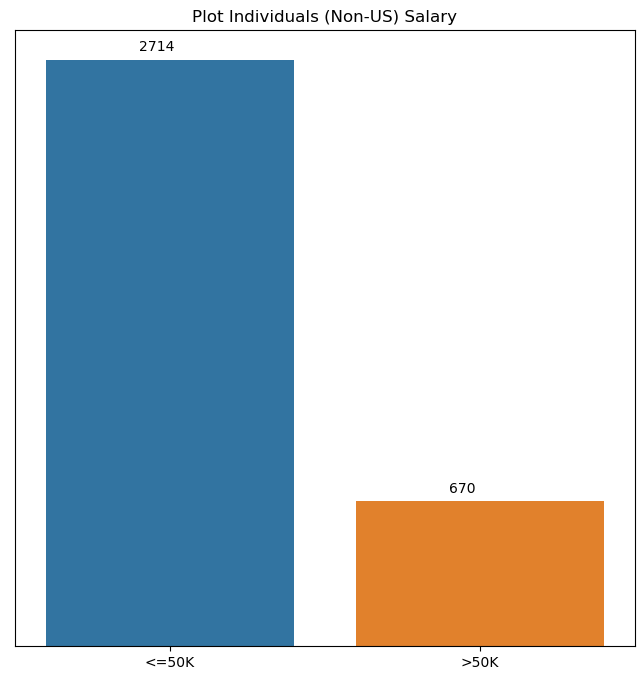

In [160]:
# Plot Individuals (Non-US) Salary
plt.figure(figsize=(8, 8))
ax = sns.countplot(x="salary", data=NonUS, order=salaryCount.index)
plt.title('Plot Individuals (Non-US) Salary')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+40))
plt.xlabel(None), plt.ylabel(None), plt.yticks([])


<AxesSubplot:>

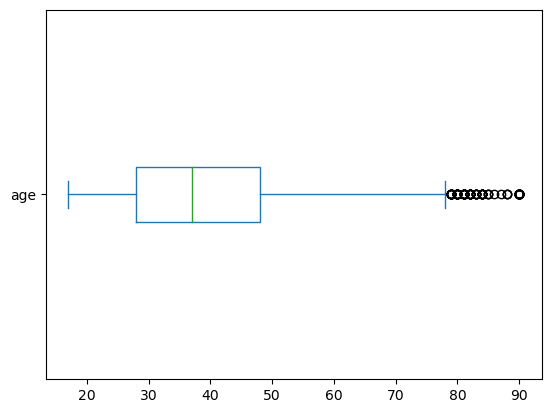

In [161]:
#Plot boxplot for 'age'
df['age'].plot.box(vert=False)

<AxesSubplot:>

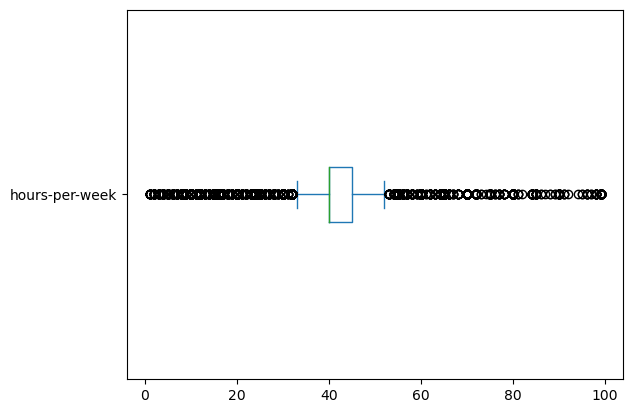

In [162]:
#Plot boxplot for 'Hours per week'
df['hours-per-week'].plot.box(vert=False)

<AxesSubplot:>

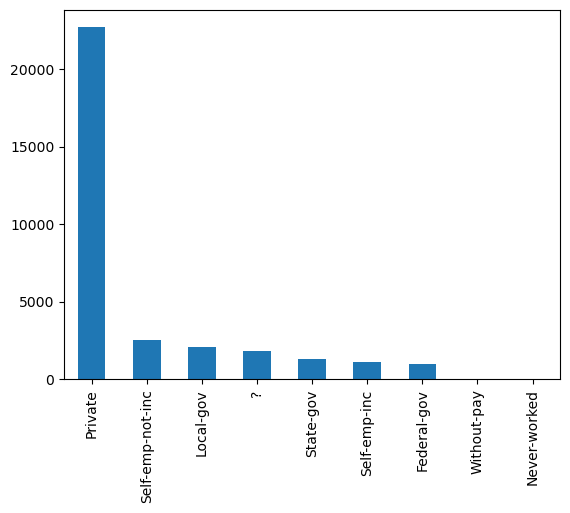

In [163]:
# Plot the distribution of 'workclass'
df['workclass'].value_counts().plot.bar()

<AxesSubplot:>

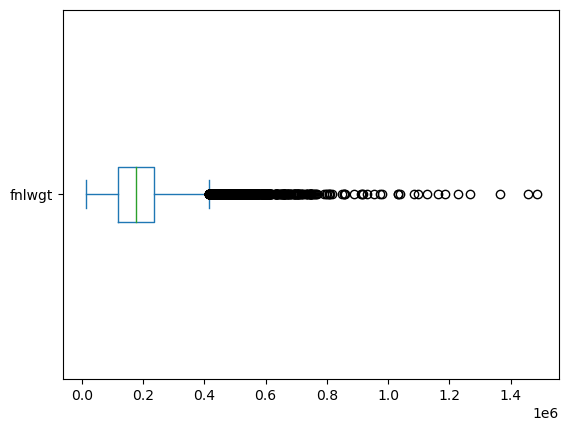

In [164]:
#Plot boxplot for 'fnlwgt'
df['fnlwgt'].plot.box(vert=False)

<AxesSubplot:>

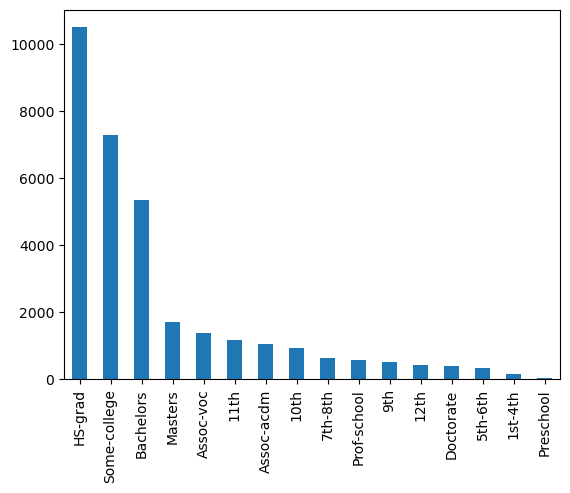

In [165]:
# Plot the distribution of 'education'
df['education'].value_counts().plot.bar()

<AxesSubplot:>

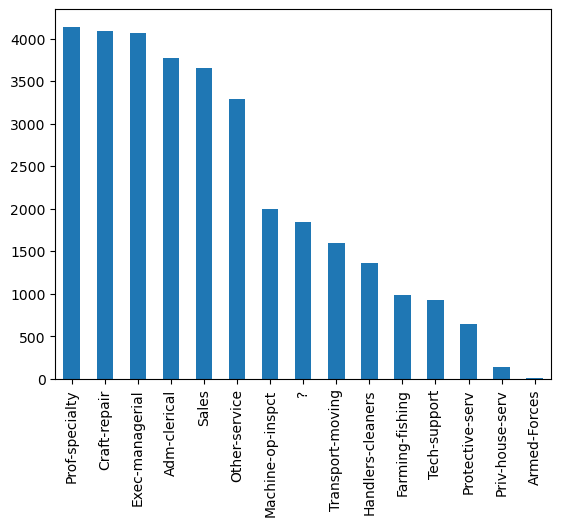

In [166]:
# Plot the distribution of 'occupation'
df['occupation'].value_counts().plot.bar()

<function matplotlib.pyplot.show(close=None, block=None)>

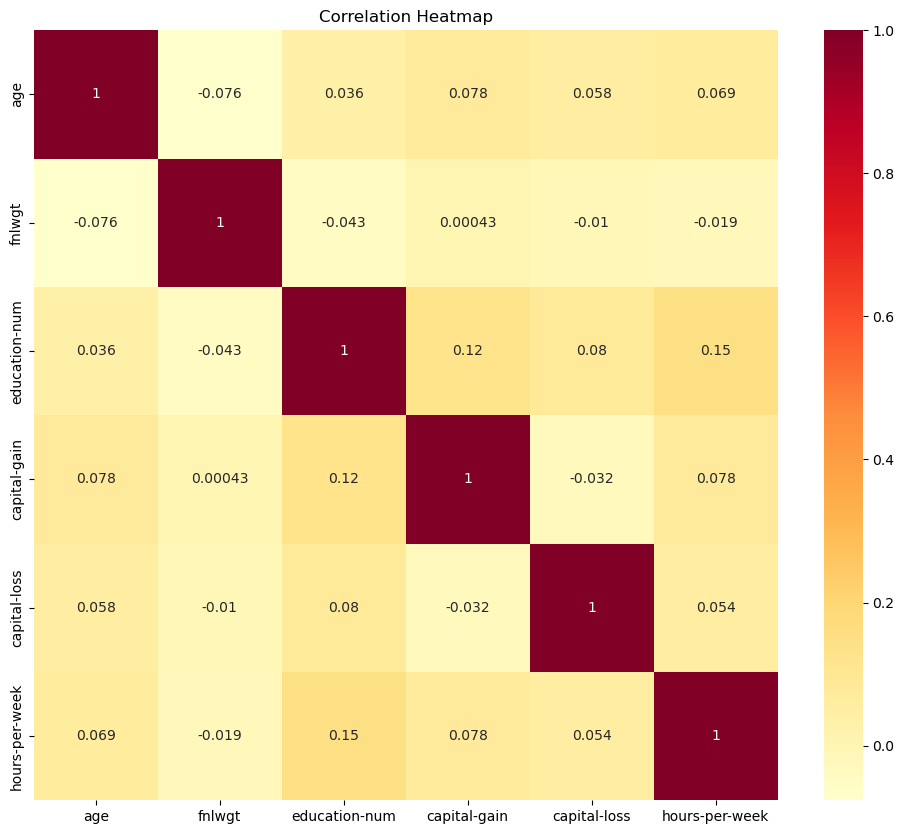

In [167]:
#write your code and answer the questions
pearson_corr = df.corr(method='pearson')

plt.figure(figsize=(12,10))
sns.heatmap(pearson_corr, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show

In [168]:
unique_records = df.drop_duplicates()
redundant_records = df[df.duplicated()]
df = df.drop_duplicates()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [169]:
# def filter_outliers_with_iqr(data, object, iqr_multiplier, remove):
#     Q1 = data[object].quantile(0.25)
#     Q3 = data[object].quantile(0.75)
#     IQR = Q3 - Q1

#     outlier = ((data[object] < (Q1 - iqr_multiplier * IQR))| (data[object] > (Q3 + iqr_multiplier * IQR)))
    
#     if remove == True:
#         # Remove outlier
#         return data.loc[~outlier]
    
#     # Replace the outlier values with the average value
#     data.loc[outlier, object] = data[object].mean()
#     return data



# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.boxenplot(x = 'age', data=df)
# plt.title('age (Before)')
# plt.subplot(1, 2, 2)
# sns.boxplot(x='hours-per-week', data = df)
# plt.title('hours-per-week (Before)')
# plt.tight_layout()
# plt.show
# print(f"Number of rows before outlier removal: {df.shape[0]}")

# after = filter_outliers_with_iqr(df, 'age', 1.5, True)
# after = filter_outliers_with_iqr(after, 'hours-per-week', 1.5, False)

# print(f"Number of rows after outlier removal: {after.shape[0]}")

# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.boxenplot(x = 'age', data=after)
# plt.title('age (After)')
# plt.subplot(1, 2, 2)
# sns.boxplot(x='hours-per-week', data=after)
# plt.title('hours-per-week (After)')
# plt.tight_layout()
# plt.show


Number of rows before outlier removal: 32537
Number of rows after outlier removal: 18983


c:\Users\Sokke\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


<function matplotlib.pyplot.show(close=None, block=None)>

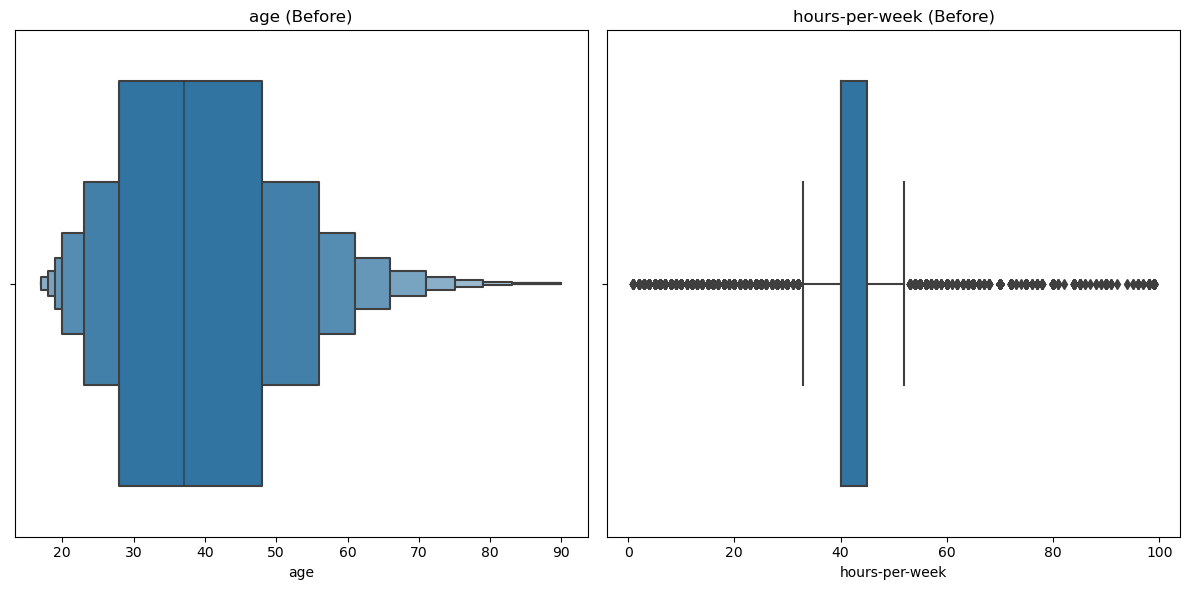

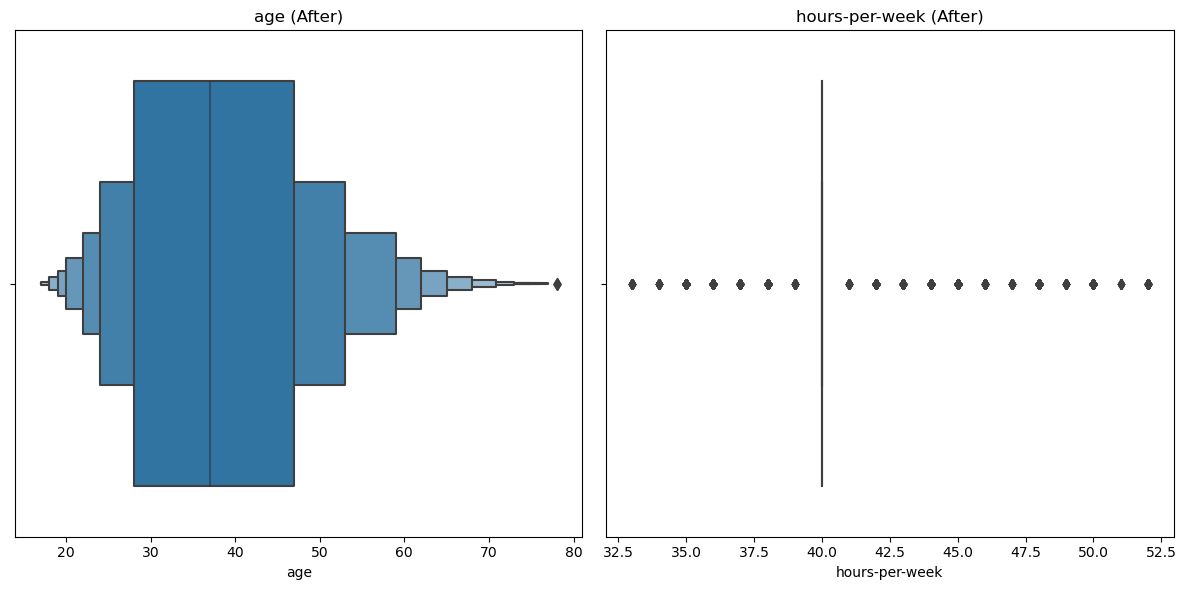

In [170]:
# def remove_outliers_with_iqr(df, object):
#     Q1 = df[object].quantile(0.25)
#     Q3 = df[object].quantile(0.75)
#     IQR = Q3 - Q1

#     outlier = ((df[object] < (Q1 - 1.5 * IQR))| (df[object] > (Q3 + 1.5 * IQR)))

#     return df.loc[~outlier]
def remove_outliers_with_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    outlier = ((data < (Q1 - 1.5 * IQR))| (data > (Q3 + 1.5 * IQR))).any(axis=1)

    return data[~outlier]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxenplot(x = 'age', data=df)
plt.title('age (Before)')
plt.subplot(1, 2, 2)
sns.boxplot(x='hours-per-week', data = df)
plt.title('hours-per-week (Before)')
plt.tight_layout()
plt.show
print(f"Number of rows before outlier removal: {df.shape[0]}")

after = remove_outliers_with_iqr(df)
# after = remove_outliers_with_iqr(after, 'hours-per-week')

print(f"Number of rows after outlier removal: {after.shape[0]}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxenplot(x = 'age', data=after)
plt.title('age (After)')
plt.subplot(1, 2, 2)
sns.boxplot(x='hours-per-week', data=after)
plt.title('hours-per-week (After)')
plt.tight_layout()
plt.show


In [171]:
# Split the data into features and target
X = df.drop('salary', axis=1)
y = df['salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)